Text(0.5, 1.0, 'Error Comparison')

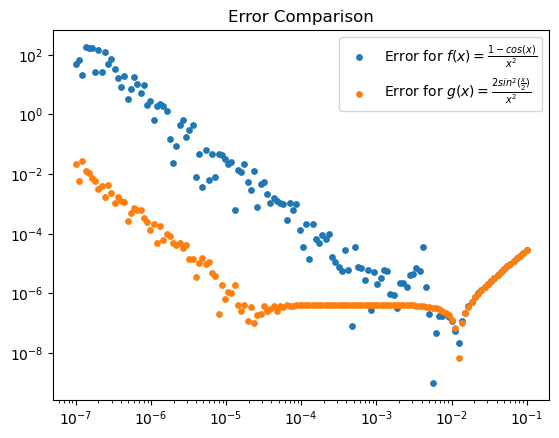

In [30]:
#Problem 3.8
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return (1.0-np.cos(x))/(x**2.0)
    
def g(x):
    return 2*(np.sin(x/2)/x)**2
    
def forward_diff(func, x, h):
    return (func(x+h)-func(x))/h
    

    
def central_diff(func, x, h):
    return (func(x+h)-func(x-h))/(2*h)
    
def doublecentral(func, x, h):
    return (func(x+h)-2*func(x)+func(x-h))/(h**2) 
    
def fpp(x):
    return (6.0-4.0*x*np.sin(x) + ((x**2.0) - 6.0)*np.cos(x))/(x**4)
    
def fp(x):
    return (x*np.sin(x)-2*(1-np.cos(x)))/(x**3)
    
def modcentral(func):
    return central_diff(func, x, 0.000001)

dx = np.logspace(-1, -7, 140)


plt.scatter(dx, np.abs(doublecentral(f, 0.004, dx) - fpp(0.004)), s=15, label=r'Error for $f(x) = \frac{1-cos(x)}{x^2}$')
plt.xscale('log')
plt.yscale('log')
plt.scatter(dx, np.abs(doublecentral(g, 0.004, dx) - fpp(0.004)), s=15, label=r'Error for $g(x) = \frac{2sin^2(\frac{x}{2})}{x^2}$')
plt.legend()
plt.title('Error Comparison')

Even though f and g are the same function, the errors are different because of catastrophic cancellation
on the numerator. However, even g isn't safe from the increasing errors as dx becomes more accurate.

Text(0.5, 1.0, 'Noisy Graph')

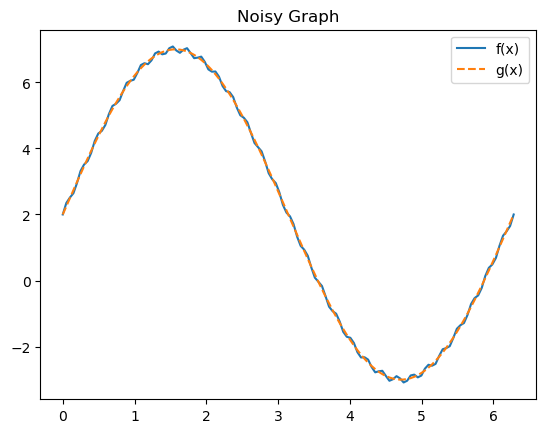

In [32]:
# Problem 3.25
def f(x):
    return (2 + 5*np.sin(x) + 0.1*np.sin(30*x))
def g(x):
    return 2 + 5*np.sin(x)
def fp(x):
    return (5*np.cos(x) + 3*np.cos(30*x))
def gp(x):
    return 5*np.cos(x)

u = np.linspace(0, 2*np.pi, 128)
table = np.array([u, f(u)])
plt.plot(u, f(u), label="f(x)")
plt.plot(u, g(u), linestyle='--', label="g(x)")
plt.legend()
plt.title('Noisy Graph')


We note that f(x) and g(x) just lie on top of each other.
In real life, the difference is almost unnoticeable! You would have to squint to see that. 
Although small, the noise will significantly change the derivative, as we are about to see.

Text(0.5, 1.0, 'Analytical vs Numerical derivatives, Δx=0.05')

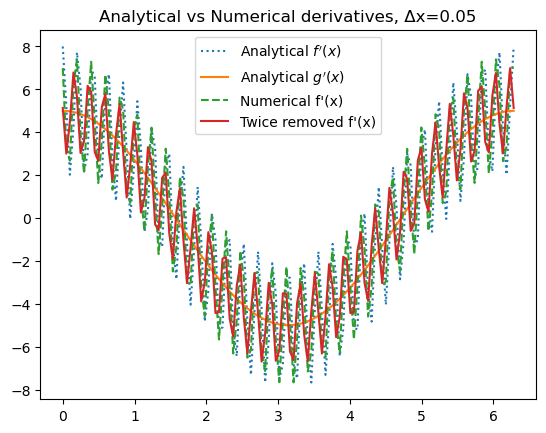

In [35]:
hh = 0.05

plt.plot(u, fp(u), linestyle='dotted', label=r"Analytical $f'(x)$")
plt.plot(u, gp(u), label=r"Analytical $g'(x)$")
plt.plot(u, forward_diff(f, u, hh), linestyle='--', label=r"Numerical f'(x)")
plt.plot(u, forward_diff(f, u, 2*hh), label="Twice removed f'(x)")
plt.legend()
plt.title('Analytical vs Numerical derivatives, Δx=0.05')

Text(0.5, 1.0, 'Analytical vs Numerical derivatives, Δx=0.001')

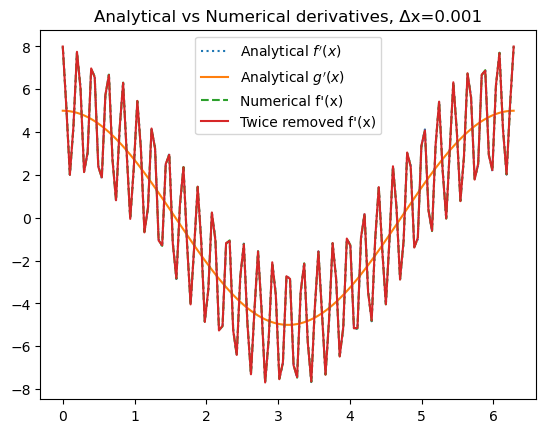

In [36]:
hh = 0.001

plt.plot(u, fp(u), linestyle='dotted', label=r"Analytical $f'(x)$")
plt.plot(u, gp(u), label=r"Analytical $g'(x)$")
plt.plot(u, forward_diff(f, u, hh), linestyle='--', label=r"Numerical f'(x)")
plt.plot(u, forward_diff(f, u, 2*hh), label="Twice removed f'(x)")
plt.legend()
plt.title('Analytical vs Numerical derivatives, Δx=0.001')

The lower we set Δx, the closer the numerical derivatives get to the analytical f'(x), which makes sense. If we choose a relatively high Δx however, as we could see, the noise amplitudes see a nice reduction. 